# Stroke Prediction using Light Gradient Boosting Machine
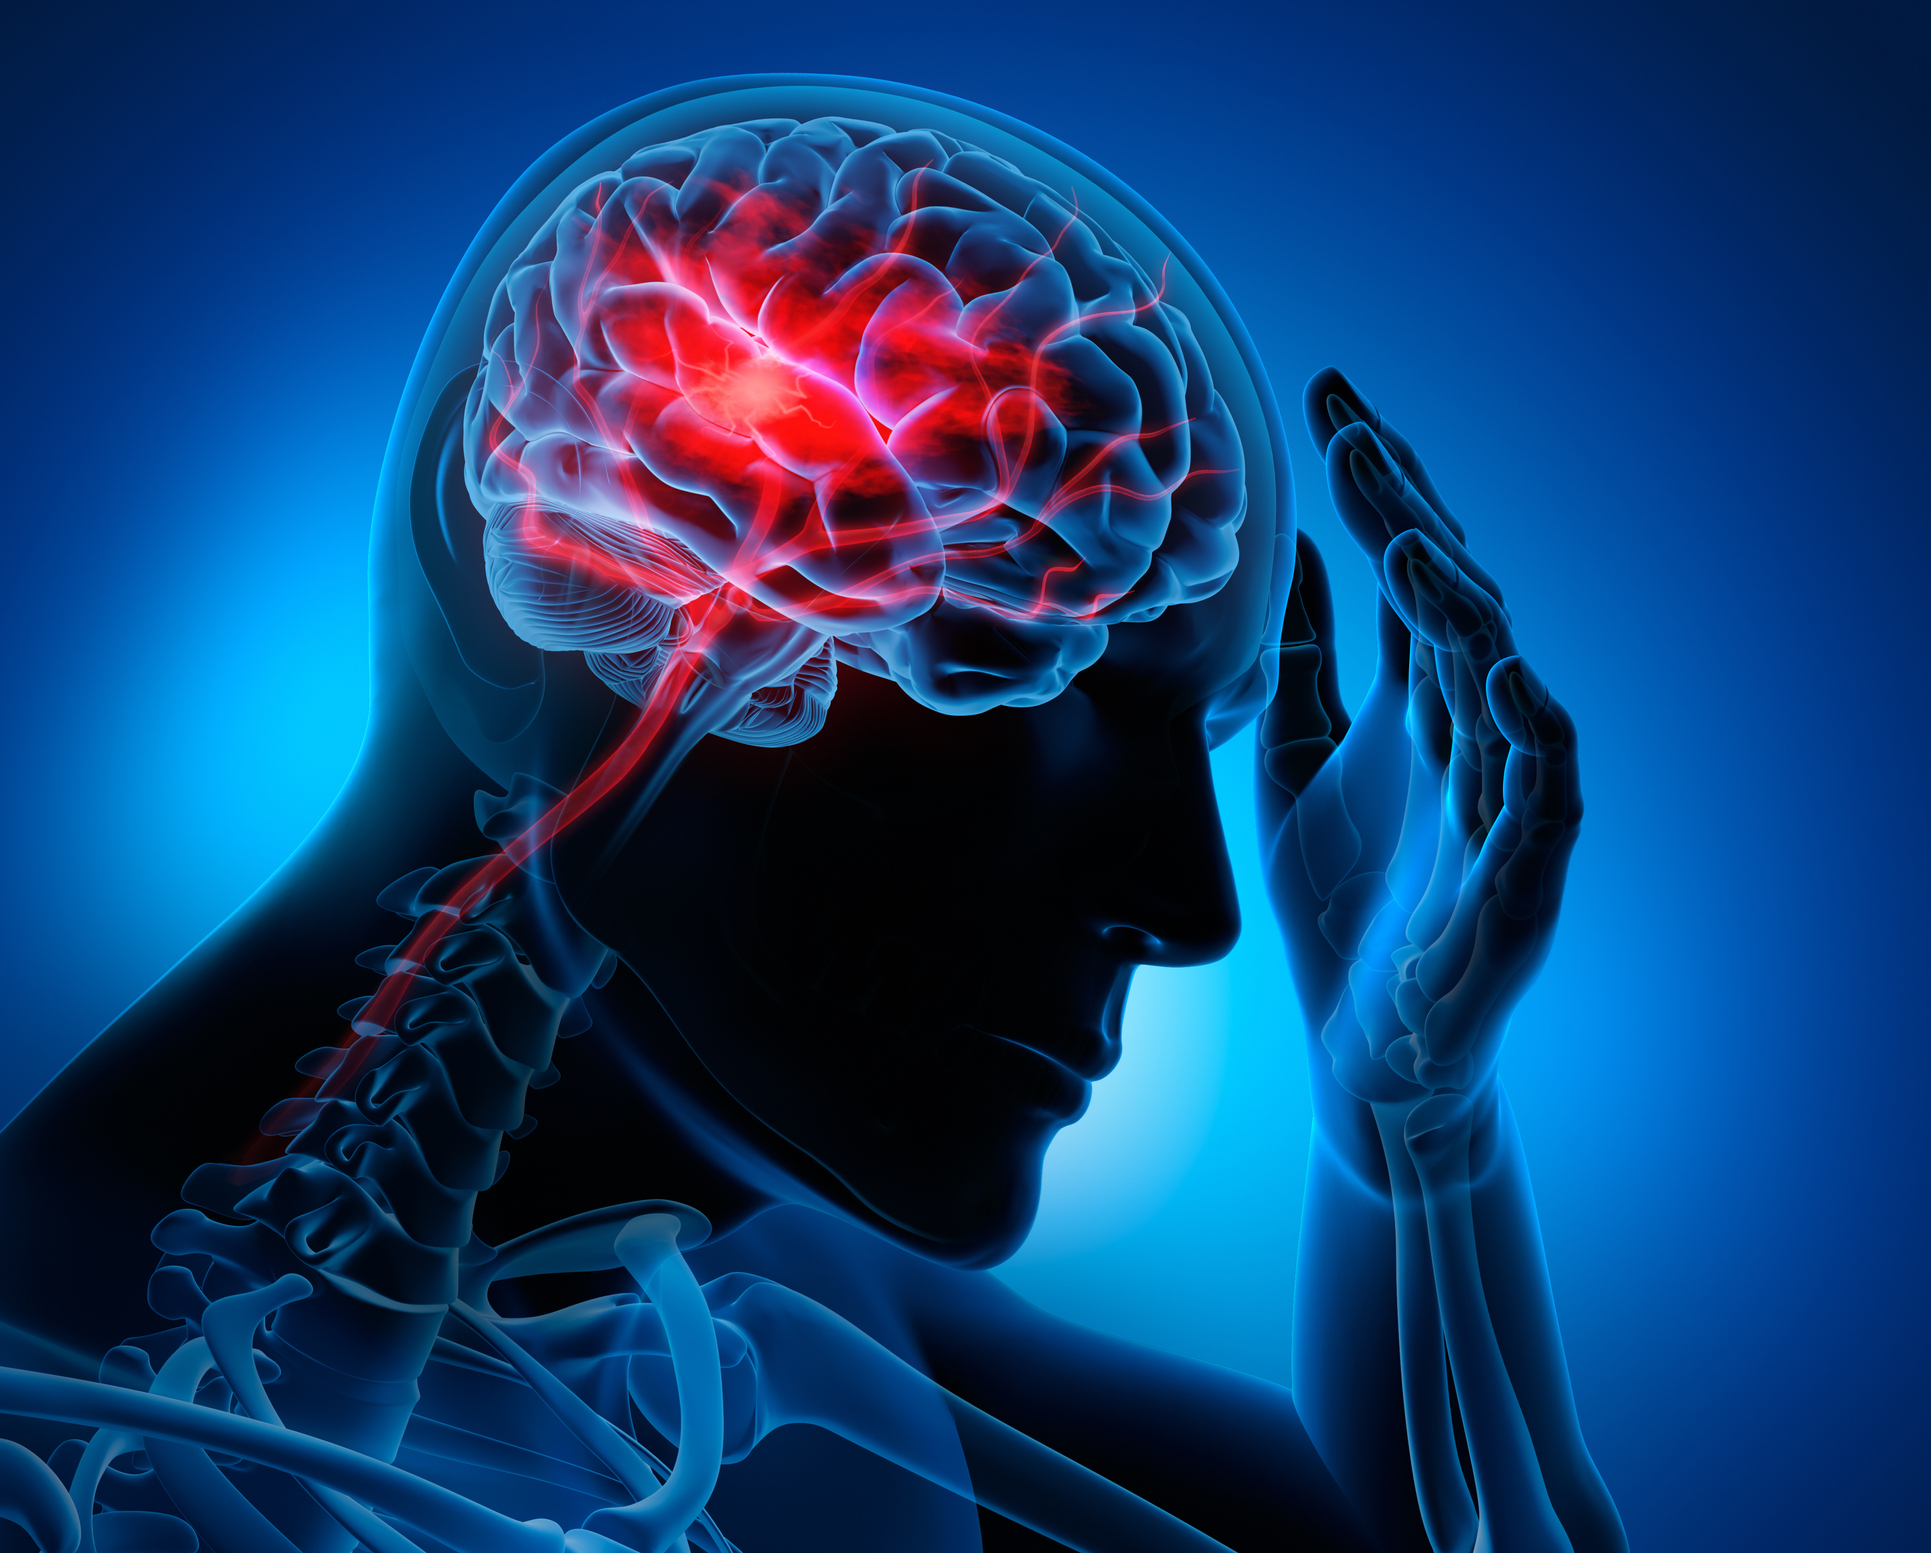

In [1]:
import numpy as np
import pandas as pd
import missingno as m
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import lightgbm as lgbm
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Reading Dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

# Data Cleaning 

<AxesSubplot:>

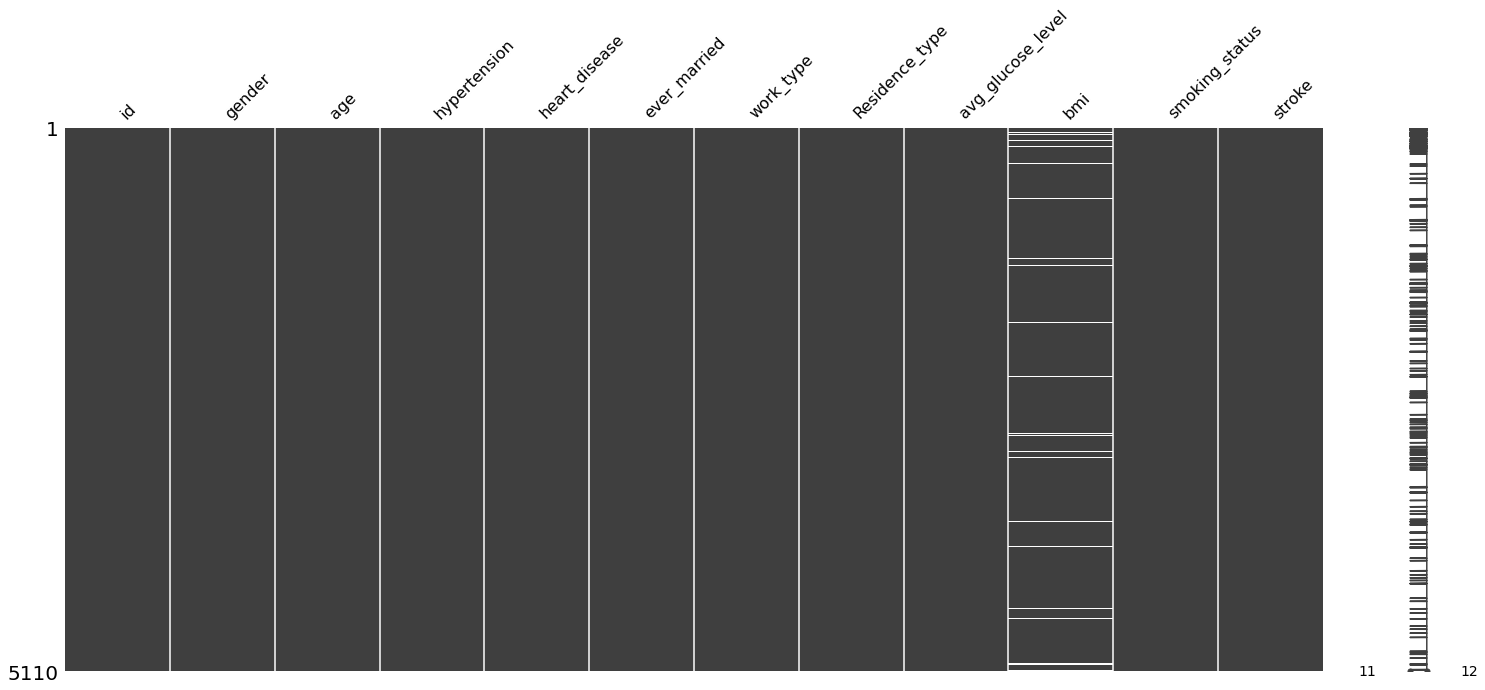

In [6]:
m.matrix(df)

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

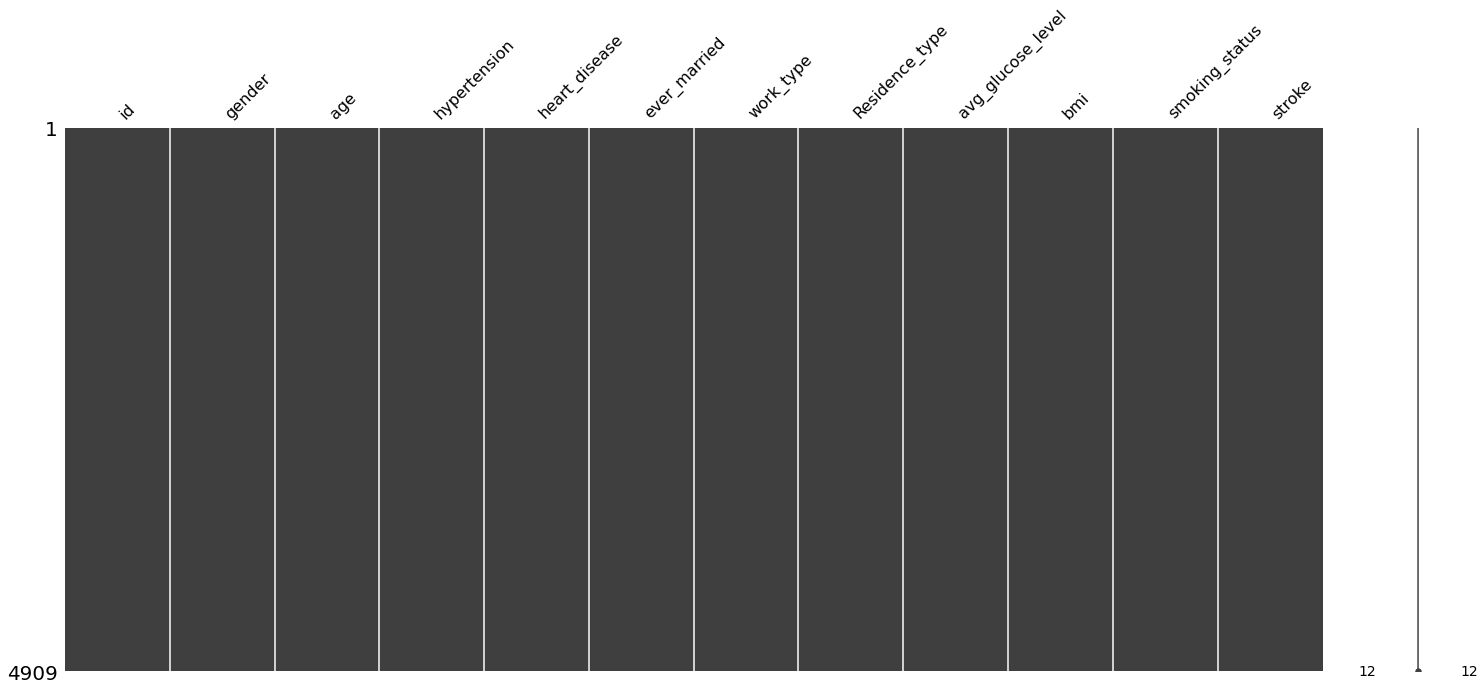

In [8]:
df = df.dropna()
m.matrix(df)

# Data Analysis

In [9]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1

In [10]:
df = df.drop(columns=['id'])

In [11]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

# Univariate, Bivariate and Multivariate Analysis

In [13]:
import plotly.express as px
fig = px.histogram(df, x="age" ,title = 'Age')
fig.show()

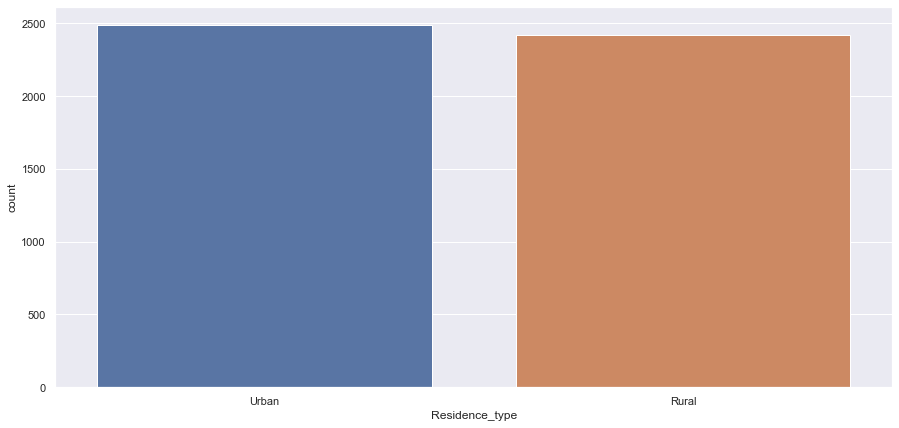

In [168]:
import seaborn as sns
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Residence_type", data=df)

In [14]:
fig = px.box(df, x="work_type", y="age",points='all',title='Work Type vs Age')
fig.show()

In [15]:
fig = px.violin(df, x="smoking_status", y="age",box=True,points='all',title='Smokinf Status with Age')
fig.show()

In [16]:
fig = px.scatter(df,x='age', y='bmi',color='stroke',title='Stroke status with respect to Age and BMI')
fig.show()

In [17]:
fig = px.scatter(df,x='bmi', y='avg_glucose_level',color='stroke',title='Stroke status with respect to Average Glucose Level and BMI')
fig.show()

In [18]:
fig = px.bar(df, x="gender", y="hypertension",title='Hypertension with respect to Gender')
fig.show()

In [19]:
fig = px.violin(df, x="Residence_type", y="age",color='stroke',box=True,title='Stroke with respect to Residence Type and Age')
fig.show()

In [20]:
fig = px.violin(df, y="age", x="heart_disease",color='stroke',box=True,title='Stroke with respect to Heart Disease  and Age')
fig.show()

In [21]:
fig = px.scatter(df, x="avg_glucose_level", y="bmi", color="age",
                  hover_data=['stroke'],title='Stroke rate with Average Glucose Level, BMI and Age')
fig.show()


In [22]:
fig = px.scatter_3d(df, x='age', y='bmi', z='avg_glucose_level',
              color='hypertension', symbol='stroke',title='Stroke rate with Hypertension ')
fig.show()


In [23]:
fig = px.scatter_3d(df, x='age', y='bmi', z='avg_glucose_level',
              color='heart_disease', symbol='stroke',title='Stroke rate with Heart disease ')
fig.show()


# Heatmap

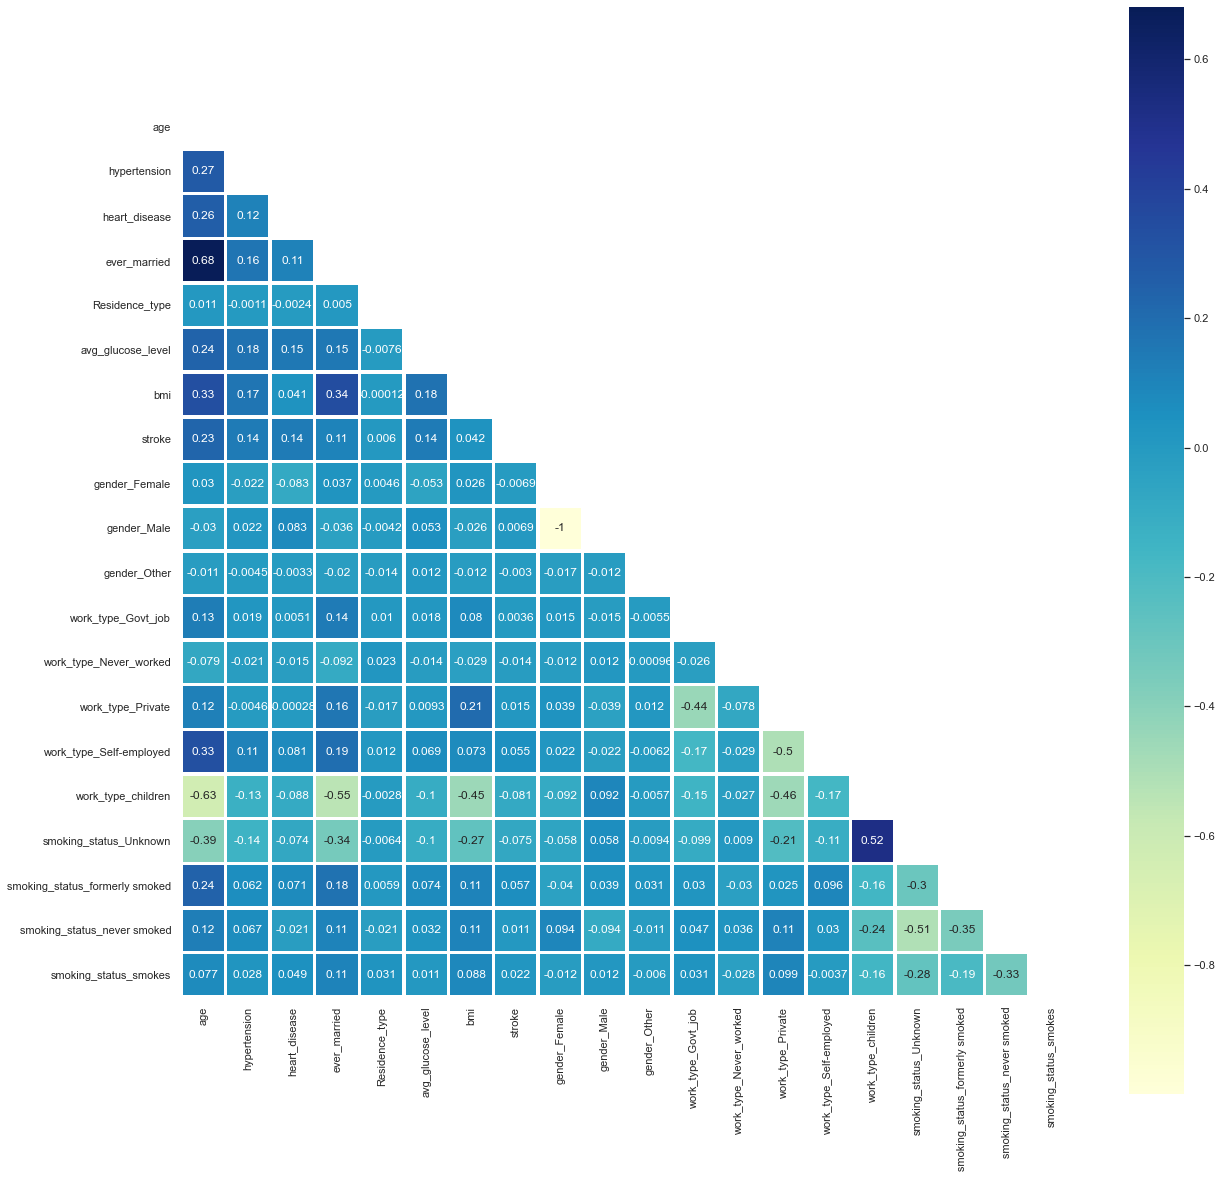

In [65]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="YlGnBu",annot=True)

# Data Preprocessing  

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [26]:
df.head()

gender   age  hypertension  heart_disease  ever_married      work_type  \
0    Male  67.0             0              1             1        Private   
2    Male  80.0             0              1             1        Private   
3  Female  49.0             0              0             1        Private   
4  Female  79.0             1              0             1  Self-employed   
5    Male  81.0             0              0             1        Private   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0               1             228.69  36.6  formerly smoked       1  
2               0             105.92  32.5     never smoked       1  
3               1             171.23  34.4           smokes       1  
4               0             174.12  24.0     never smoked       1  
5               1             186.21  29.0  formerly smoked       1

In [27]:
df = pd.get_dummies(df, columns = ['gender','work_type','smoking_status'])

In [28]:
df.shape

(4909, 20)

In [29]:
df.head()

age  hypertension  heart_disease  ever_married  Residence_type  \
0  67.0             0              1             1               1   
2  80.0             0              1             1               0   
3  49.0             0              0             1               1   
4  79.0             1              0             1               0   
5  81.0             0              0             1               1   

   avg_glucose_level   bmi  stroke  gender_Female  gender_Male  gender_Other  \
0             228.69  36.6       1              0            1             0   
2             105.92  32.5       1              0            1             0   
3             171.23  34.4       1              1            0             0   
4             174.12  24.0       1              1            0             0   
5             186.21  29.0       1              0            1             0   

   work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                   0                       0                  1   
2                   0                       0                  1   
3                   0                       0                  1   
4                   0                       0                  0   
5                   0                       0                  1   

   work_type_Self-employed  work_type_children  smoking_status_Unknown  \
0                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        1                   0                       0   
5                        0                   0                       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
2                               0                            1   
3                               0                            0   
4                               0                            1   
5                               1                            0   

   smoking_status_smokes  
0                      0  
2                      0  
3                      1  
4                      0  
5                      0

In [30]:
X = df.drop('stroke', axis = 1)
y = df.stroke

In [31]:
X.shape

(4909, 19)

In [32]:
y.shape

(4909,)

### Target Variable Before Oversampling

<AxesSubplot:xlabel='stroke', ylabel='count'>

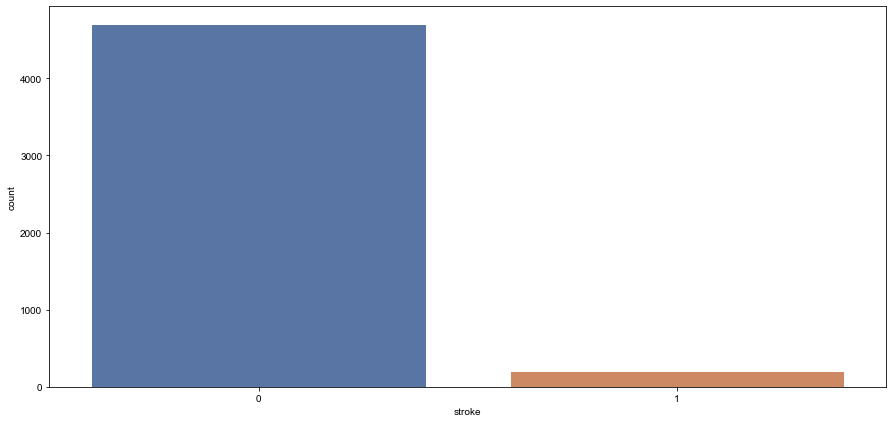

In [34]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid")
sns.countplot(x = y, data = df)

# Using SMOTE, oversampling...

In [35]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

In [36]:
X_res.shape

(9400, 19)

In [37]:
y_res.shape

(9400,)

### Target Variable After Oversampling

<AxesSubplot:xlabel='stroke', ylabel='count'>

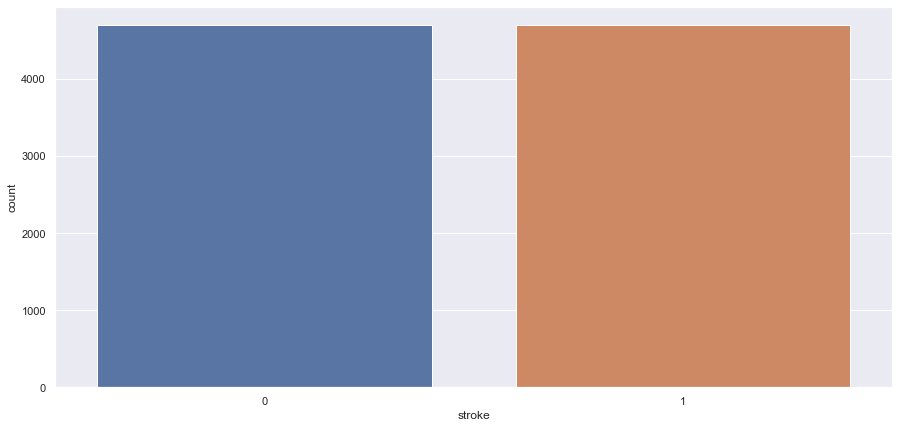

In [38]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid")
sns.countplot(x = y_res, data = df)

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

# Light Gradient Boosting Machine with Grid Search 

In [40]:
parameters = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [7, 15, 31],
}

model_lgbm = lgbm.LGBMClassifier(
    random_state=42,
    class_weight='balanced',
)

model_lgbm = GridSearchCV(
    model_lgbm, 
    parameters, 
    cv=5)

In [41]:
model_lgbm.fit(X_train, y_train)
model_lgbm_pred = model_lgbm.predict(X_test)

In [42]:
y_test1 = y_test.values

# Predictiion

In [44]:
y_pred = model_lgbm.predict(X_test)
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test1.reshape(len(y_test1),1)),1)
data

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]], dtype=int64)

# Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,model_lgbm_pred)
print(cm)

[[909  13]
 [ 36 922]]


<AxesSubplot:>

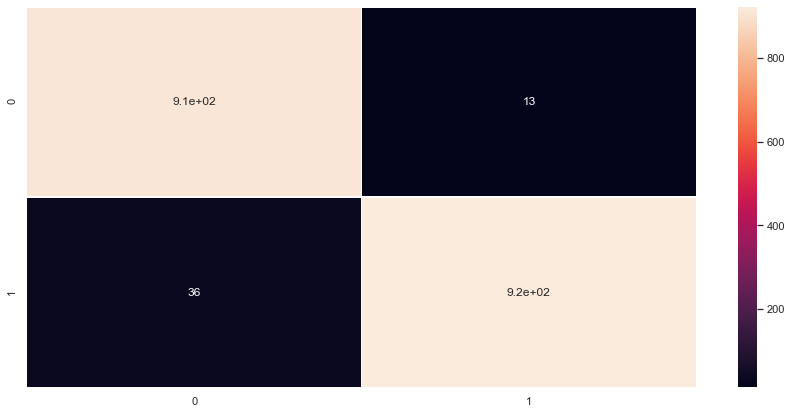

In [46]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm,annot=True,
            linewidths=.5)

# Accuracy

In [47]:
a = accuracy_score(model_lgbm_pred,y_test)
a = np.around(a, decimals=2, out=None)
a = a*100
print(f"Accuracy : {a}%")

Accuracy : 97.0%


In [48]:
print(classification_report(model_lgbm_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       945
           1       0.96      0.99      0.97       935

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



In [49]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'model_lgbm_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')

In [50]:
dataset = pd.read_csv('accuracy.csv')
dataset

Unnamed: 0  y_test  model_lgbm_pred
0              0       0                0
1              1       0                0
2              2       0                0
3              3       1                1
4              4       0                0
...          ...     ...              ...
1875        1875       0                0
1876        1876       0                0
1877        1877       0                0
1878        1878       0                0
1879        1879       1                1

[1880 rows x 3 columns]

# Actual value vs Predicted Value Plotting

In [51]:
import plotly.graph_objects as go



fig = go.Figure()
fig.add_trace(go.Bar(x=dataset['Unnamed: 0'],
                y=dataset['y_test'],
                name='y_test',
                marker_color='crimson'
                ))
fig.add_trace(go.Bar(x=dataset['Unnamed: 0'],
                y=dataset['model_lgbm_pred'],
                name='y_pred',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='US Export of Plastic Scrap',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD (millions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()